In [1]:
import pandas as pd, numpy as np
from fidap import fidap_client
import config

In [2]:
fidap = fidap_client(db="sf_gcp", api_key=config.FIDAP_API_KEY)

# Reddit/WallStreetBets Stock Analysis

## Ticker Mentions Count in Week

In [74]:
df_mentions = fidap.sql(f"""SELECT * FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."wallstreetbets_weekly_top" ORDER BY "count" DESC;""")
df_mentions.set_index("ticker", inplace=True)

In [75]:
df_mentions.head()

,count,from_date,to_date
ticker,,,
GME,15,2021-03-23,2021-03-30
UWMC,7,2021-03-23,2021-03-30
TLRY,6,2021-03-23,2021-03-30
BB,4,2021-03-23,2021-03-30
VIAC,3,2021-03-23,2021-03-30


<AxesSubplot:title={'center':'Weekly Top 10 Ticker Mentions in WSB'}, ylabel='count'>

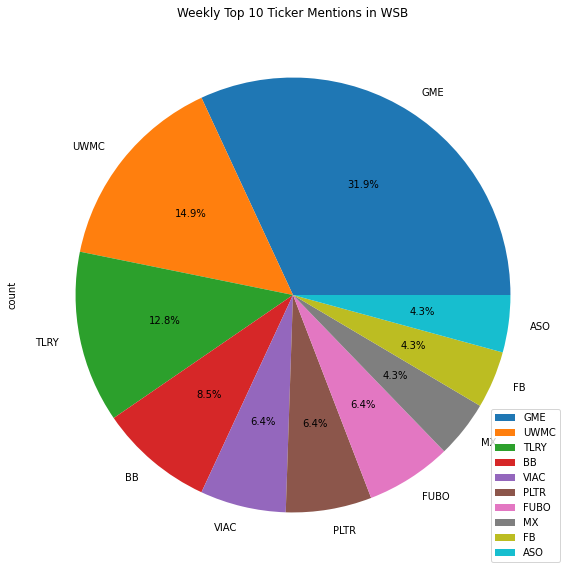

In [16]:
df_mentions.head(10).plot.pie(y='count', figsize=(10,10), title="Weekly Top 10 Ticker Mentions in WSB", autopct='%1.1f%%')

## Mentions vs. Price Movements

In [77]:
df_mentions = fidap.sql(f"""SELECT L."ticker", AVG(R."close") "avg_close",MAX("count") "max_count", AVG(R."marketcap") "avg_marketcap", SUM(R."pc_1d")*100 "total_pc_move", ABS("total_pc_move") "total_abs_pct_move", MAX(ABS(R."pc_1d"))*100 "max_abs_pc_move", "max_abs_pc_move"/"max_count" "pc_move_mentions" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."wallstreetbets_weekly_top" L
LEFT OUTER JOIN
(SELECT "ticker", "marketcap", "close", "pc_1d","date" FROM "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."daily" WHERE "marketcap" IS NOT NULL) R ON L."ticker"=R."ticker" AND L."from_date" <= R."date" WHERE "close" IS NOT NULL GROUP BY L."ticker" ORDER BY "max_count" DESC, "pc_move_mentions" DESC;""")

### Top 20 Tickers Mentioned with the Highest Absolute Total Price Movements (+/-) in the Week

In [64]:
df_pct_move = df_mentions.sort_values(by='total_abs_pct_move', ascending=False).head(20)
df_pct_move.set_index('ticker', inplace=True)

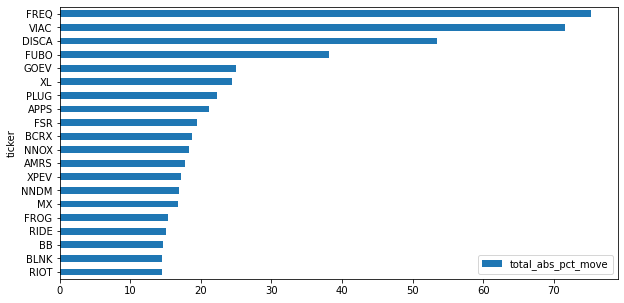

In [66]:
df_pct_move.plot.barh(y='total_abs_pct_move', figsize=(10,5)).invert_yaxis()

### Top 20 Tickers Mentioned with the Highest Max Daily Price Movements to Mentions Ratio

A column was created called percent move vs mentions, which aims to check if there exists a ratio which can show the overall percent move over the weeks with the most mentions of a stock.

The graph below shows the total weekly percent move sorted by the tickers with the highest mentions

In [80]:
df_ratio = df_mentions.head(20)
df_ratio.set_index("ticker", inplace=True)  

In [82]:
df_ratio.head()

,avg_close,max_count,avg_marketcap,total_pc_move,total_abs_pct_move,max_abs_pc_move,pc_move_mentions
ticker,,,,,,,
GME,169.628,15,11863080000,11.022883,11.022883,52.692372,3.512825
UWMC,8.136,7,432220000,-9.872771,9.872771,3.872437,0.553205
TLRY,22.390,6,3845640000,-9.720032,9.720032,4.435831,0.739305
BB,9.672,4,5441780000,-14.705715,14.705715,5.975724,1.493931
VIAC,64.188,3,39771300000,-71.572845,71.572845,27.309721,9.103240


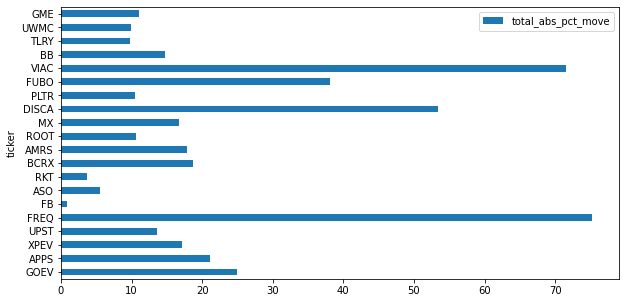

In [84]:
df_ratio.plot.barh(y="total_abs_pct_move", figsize=(10,5)).invert_yaxis()

### Top 20 Tickers Mentioned with the Highest Max Absolute Price Movement (+/-)

In this section we look at the tickers with the highest single day percent/price movement in either direction (+/-)

In [70]:
df_day_pct = df_mentions.sort_values(by='max_abs_pc_move', ascending=False).head(20)
df_day_pct.set_index('ticker', inplace=True)
df_day_pct.head()

,avg_close,max_count,avg_marketcap,total_pc_move,total_abs_pct_move,max_abs_pc_move,pc_move_mentions
ticker,,,,,,,
FREQ,8.508,1,287720000,-75.250989,75.250989,77.982915,77.982915
GME,169.628,15,11863080000,11.022883,11.022883,52.692372,3.512825
UPST,126.386,1,9304720000,-13.556881,13.556881,28.137320,28.137320
DISCA,54.900,2,26754640000,-53.376280,53.376280,27.445887,13.722944
MX,22.654,2,805100000,16.705469,16.705469,27.437531,13.718765


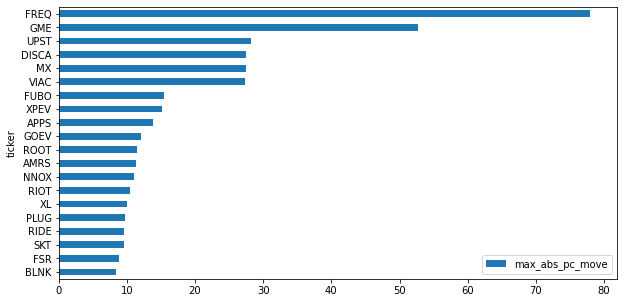

In [71]:
df_day_pct.plot.barh(y='max_abs_pc_move', figsize=(10,5)).invert_yaxis()